## ANALISIS DE VENTAS DE SUPERMERCADO - PRIMER TRIMESTRE 2019

_Informe generado con Python y Jupyter Notebook_

## INDICE DE CONTENIDOS
- ANALISIS GENERALES
- [1. TOTAL DE VENTAS DEL TRIMESTRE](#1-TOTAL-DE-VENTAS-DEL-TRIMESTRE)
- [2. EL PROMEDIO DE VENTAS](#2-EL-PROMEDIO-DE-VENTAS)
- [3. VENTAS MENSUALES](#3-VENTAS-MENSUALES)
- [4. FACTURAS CON MAYOR MONTO TOTAL](#4-FACTURAS-CON-MAYOR-MONTO-TOTAL)
- ANALISIS POR SUCURSALES
- [5. ANALISIS DE VENTAS POR SUCURSAL](#5-ANALISIS-DE-VENTAS-POR-SUCURSAL)
- [6. ANALISIS DE CANTIDAD DE VENTA POR SUCURSAL](#6-ANALISIS-DE-CANTIDAD-DE-VENTA-POR-SUCURSAL)
- ANALISIS TEMPORAL
- [7. ANALISIS DEL DIA DE LA SEMANA CON MAS VENTAS](#7-ANALISIS-DEL-DIA-DE-LA-SEMANA-CON-MAS-VENTAS)
- [8. ANALISIS DE LA FRANJA HORARIA CON MAYOR CANTIDAD DE VENTAS](#8-ANALISIS-DE-LA-FRANJA-HORARIA-CON-MAYOR-CANTIDAD-DE-VENTAS)
- ANALISIS POR PRODUCTO
- [9. ANALISIS DE LOS PRODUCTOS MAS VENDIDOS](#9-ANALISIS-DE-LOS-PRODUCTOS-MAS-VENDIDOS)
- [10. ANALISIS DE INGRESOS POR LINEAS DE PRODUCTOS](#10-ANALISIS-DE-INGRESOS-POR-LINEA-DE-PRODUCTOS)
- [11. ANALISIS DE TICKET PROMEDIO POR PRODUCTO](#11-ANALISIS-DE-TICKET-PROMEDIO-POR-PRODUCTO)
- ANALISIS DE CLIENTES
- [12. GENERO QUE REALIZA MAS COMPRAS](#12-GENERO-QUE-REALIZA-MAS-COMPRAS)
- [13. ANALISIS POR TIPO DE CLIENTES](#13-ANALISIS-POR-TIPO-DE-CLIENTES)
- [14. ANALISIS DEL TICKET PROMEDIO POR CLIENTE](#14-ANALISIS-DEL-TICKET-PROMEDIO-POR-CLIENTE)
- [15. METODO DE PAGO MAS UTILIZADO POR CLIENTES](#15-METODO-DE-PAGO-MAS-UTILIZADO-POR-CLIENTES)
- [CONCLUSION FINAL](#CONCLUSIO-FINAL)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [5]:
#-----------------------------NIVEL 1-------------------------------------------
#-----------------------Cargar el dataset y mostrar las primeras 10 filas--------
ruta = r"C:\\Users\\Usuario\\Desktop\\Curso Titularizado Python\\Practica ChatGPT"

pdatos = pd.read_csv(ruta + "\\SuperMarket Analysis.csv", encoding="UTF-8")

datosMarket = pd.DataFrame(pdatos)

--------------------------------------ANALISIS GENERALES----------------------------------

## 1) TOTAL DE VENTAS DEL TRIMESTRE
   
Vamos a ver cual fue el total de ventas del trimestre, asi como su rentabilidad bruta para su análisis

In [6]:
#Agrupar por mes y sumar ventas
datosMarket["Date"]= pd.to_datetime(datosMarket["Date"])
datosMarket["Mes"]= datosMarket["Date"].dt.month
total_ingresos= datosMarket["Sales"].sum()
print("El total de ingresos del trimestre fue: ")
print(total_ingresos)

El total de ingresos del trimestre fue: 
322966.749


In [7]:
#Rentabilidad total del trimestre
rentabilidad_total= datosMarket["gross income"].sum()

print("\nLe rentabilidad bruta del trimestre: ")
print(round(rentabilidad_total, 2))



Le rentabilidad bruta del trimestre: 
15379.37


In [8]:
porcentaje_rentabilidad= rentabilidad_total/total_ingresos

print("\nEl porcentaje de rentabilidad bruta es de: ")
print(round(porcentaje_rentabilidad, 2))


El porcentaje de rentabilidad bruta es de: 
0.05


**Conclusiones generales de ventas y rentabilidad**

- **Ingresos totales**: El total de ventas generadas durante el trimestre fue de **USD 322,966.75**, lo que indica una operación comercial activa y con buen ritmo de facturación.
- **Rentabilidad bruta**: La **utilidad bruta fue de USD 15,379.37**, lo cual representa aproximadamente un **4.76% de rentabilidad** sobre las ventas totales.
- **Interpretación**: Aunque los ingresos fueron altos, la rentabilidad es relativamente ajustada, lo que sugiere márgenes bajos o altos costos operativos.
- **Recomendación**: Sería útil analizar costos, promociones y márgenes por producto para optimizar la rentabilidad en próximos trimestres.

## 2) EL PROMEDIO DE VENTAS
   
Vamos a analizar cual es el importe promedio de ventas del trimestre

In [9]:
#-----------------El promedio de ventas del trimestre------------------
promedio_ventas= datosMarket["Sales"].mean()

print("\nEl promedio de ventas del trimestre es: ")
print(round(promedio_ventas, 2))


El promedio de ventas del trimestre es: 
322.97


**Conclusiones sobre las ventas promedio del ultimo trimestre**

El **ticket promedio** por transacción durante el trimestre fue de $322.97.

Este valor representa un nivel de gasto medio por cliente que puede considerarse consistente, dado el rango de productos del supermercado.

Puede utilizarse como referencia base para campañas de fidelización o promociones (por ejemplo, ofrecer un beneficio si el ticket supera el promedio).

Si se compara este promedio entre sucursales o tipos de clientes, se pueden detectar oportunidades de mejora en ventas o personalización de ofertas.

## 3) VENTAS MENSUALES
   
En este gráfico de barras se representa el total de ventas por mes a lo largo del tiempo. Esta visualización permite identificar estacionalidades, tendencias de crecimiento o caída en las ventas, y facilita la comparación directa entre distintos períodos.

Se utilizó `Seaborn` con el estilo `whitegrid` para una presentación limpia y profesional.


Las ventas mensuales son: 
       Mes1       Sales
0  Jan 2019  116291.868
1  Feb 2019   97219.374
2  Mar 2019  109455.507


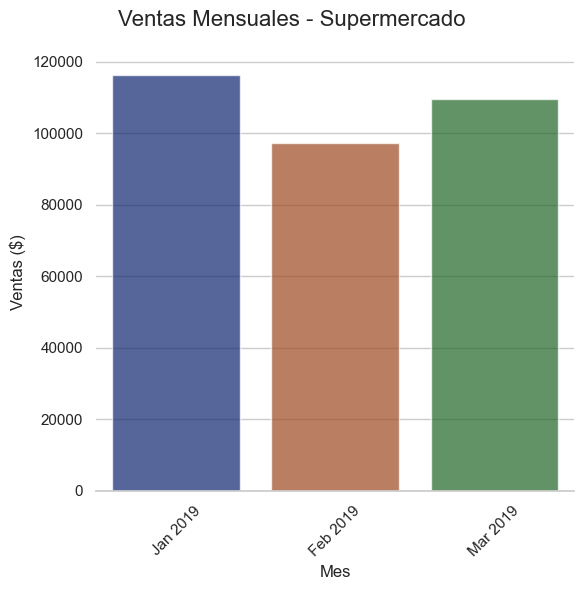

In [10]:
# Asegurarse de que la columna Mes1 exista y esté en formato adecuado
datosMarket["Mes1"] = datosMarket["Date"].dt.to_period("M").astype(str)

# Agrupar por mes y sumar las ventas
ventas_mensuales = datosMarket.groupby("Mes1")["Sales"].sum().reset_index()

# Ordenar cronológicamente
ventas_mensuales["Mes1"] = pd.to_datetime(ventas_mensuales["Mes1"])
ventas_mensuales = ventas_mensuales.sort_values("Mes1")
ventas_mensuales["Mes1"] = ventas_mensuales["Mes1"].dt.strftime("%b %Y")  # Ej: 'Jan 2019'

print("\nLas ventas mensuales son: ")
print(ventas_mensuales)


# Estilo Seaborn
sns.set_theme(style="whitegrid")

# Gráfico de barras
g = sns.catplot(
    data=ventas_mensuales,
    kind="bar",
    x="Mes1", y="Sales", 
    palette="dark", alpha=.7, height=6
)

# Personalización
g.despine(left=True)
g.set_axis_labels("Mes", "Ventas ($)")
g.fig.suptitle("Ventas Mensuales - Supermercado", fontsize=16)
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

**Conclusiones de las ventas mensuales**

- Las ventas más altas se dieron en enero (116K).
- Febrero presentó una caída del 16%.
- Marzo mostró una recuperación del 12.6% respecto a febrero.
- Se sugiere un patrón estacional en el primer trimestre.

## 4) FACTURAS CON MAYOR MONTO TOTAL

Vamos a analizar cuales fueron las facturas con mayor monto total vendido

In [40]:
#---------------Las 10 facturas de mayor monto-----------------------
#Agrupar facturas y sucursal, sumando las ventas
factura_monto= datosMarket.groupby(["Invoice ID", "Branch"])["Sales"].sum().reset_index()

#Ordenar de mayor a menor
factura_top10= factura_monto.sort_values("Sales", ascending=False).head(10)



**Conclusión de factura de mayor monto en el trimestre**

 Top 10 Facturas con Mayor Monto del Trimestre

| ID de Factura  | Sucursal | Monto ($) |
|----------------|----------|-----------|
| 860-79-0874    | Giza     | 1042.65   |
| 687-47-8271    | Alex     | 1039.29   |
| 283-26-5248    | Giza     | 1034.46   |
| 751-41-9720    | Giza     | 1023.75   |
| 303-96-2227    | Cairo    | 1022.49   |
| 744-16-7898    | Cairo    | 1022.39   |
| 271-88-8734    | Giza     | 1020.71   |
| 234-65-2137    | Giza     | 1003.59   |
| 554-42-2417    | Giza     | 1002.12   |
| 325-77-6186    | Alex     | 951.83    |

---

***Conclusiones***:

- Las facturas con mayor monto oscilan entre **951 y 1042 dólares**.
- La **sucursal Giza** aparece en **6 de las 10 facturas** principales, lo que sugiere una fuerte concentración de ventas grandes en esa ubicación.
- **Cairo y Alex** también están representadas, pero en menor proporción.
- Estas ventas podrían corresponder a clientes frecuentes o compras por volumen.
- Sería valioso analizar si estas facturas están vinculadas a algún segmento de cliente específico o promoción activa.

---------------------------ANALISIS POR SUCURSALES--------------------------------

## 5) ANALISIS DE VENTAS POR SUCURSALES 

Nos centramos en comparar las ventas totales por sucursal y realizamos un grafico el cual nos muestra los distintos niveles de las ventas


Total de ventas del trimestre por sucursal es: 
  Branch      Sales
2   Giza  110568.71
1  Cairo  106197.67
0   Alex  106200.37


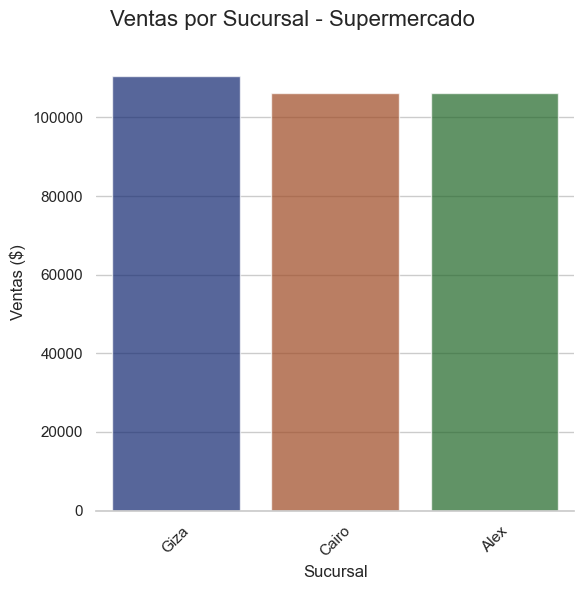

In [16]:
#------------------Que sucursal genero mas ingresos-------------------------------
ingresos_por_sucursales= datosMarket.groupby("Branch")["Sales"].sum().reset_index().sort_index(ascending=False)

#Mostrar resultado
print("\nTotal de ventas del trimestre por sucursal es: ")
print(round(ingresos_por_sucursales, 2))

# Estilo Seaborn
sns.set_theme(style="whitegrid")

# Gráfico de barras
g = sns.catplot(
    data=ingresos_por_sucursales,
    kind="bar",
    x="Branch", y="Sales", 
    palette="dark", alpha=.7, height=6
)

# Personalización
g.despine(left=True)
g.set_axis_labels("Sucursal", "Ventas ($)")
g.fig.suptitle("Ventas por Sucursal - Supermercado", fontsize=16)
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

## 6) ANALISIS DE CANTIDAD DE VENTAS POR SUCURSAL

 Es importante ver la cantidad de ventas realizadas en cada sucursal y su correlación con los montos de ventas
 

In [14]:
#--------------Cantidad de ventas por sucursal-------------------------
#Agrupar cantidad de facturas por sucursal
cantidad_ventas= datosMarket.groupby("Branch")["Invoice ID"].nunique()

#Ordenar los resultados
numero_ventas_sucursal= cantidad_ventas.sort_values(ascending=False)

# Mostrar en consola
print("Cantidad de ventas por sucursal:")
print(numero_ventas_sucursal)

Cantidad de ventas por sucursal:
Branch
Alex     340
Cairo    332
Giza     328
Name: Invoice ID, dtype: int64


***Conclusión sobre la cantidad de ventas y facturación por sucursal***

La sucursal **Alex** fue la que realizó más ventas (340) durante el trimestre, lo que refleja un alto nivel de actividad comercial.

Sin embargo, la sucursal **Giza**, a pesar de haber tenido la menor cantidad de ventas (328), fue la que generó mayores ingresos ($110,568.71).

Esto indica que el valor promedio por venta en **Giza** fue mayor, lo cual puede deberse a precios más altos, productos de mayor valor o estrategias de venta más efectivas.

La sucursal **Cairo** se mantuvo equilibrada en cantidad de ventas (332) y volumen de ingresos ($106,197.67), sin destacarse especialmente en ninguna de las dos métricas.

**Interpretación**: No solo es importante analizar la cantidad de ventas, sino también su valor. Giza demuestra que un menor volumen de ventas no necesariamente implica menores ingresos, lo que podría ser clave para decisiones estratégicas futuras.

------------------------------ANALISIS TEMPORAL-----------------------------------------

## 7) ANALISIS DEL DIA DE LA SEMANA CON MAS VENTAS
   
El análisis y gráfico incluye el día de la semana con mayor volúmen de venta por sucursal 
   

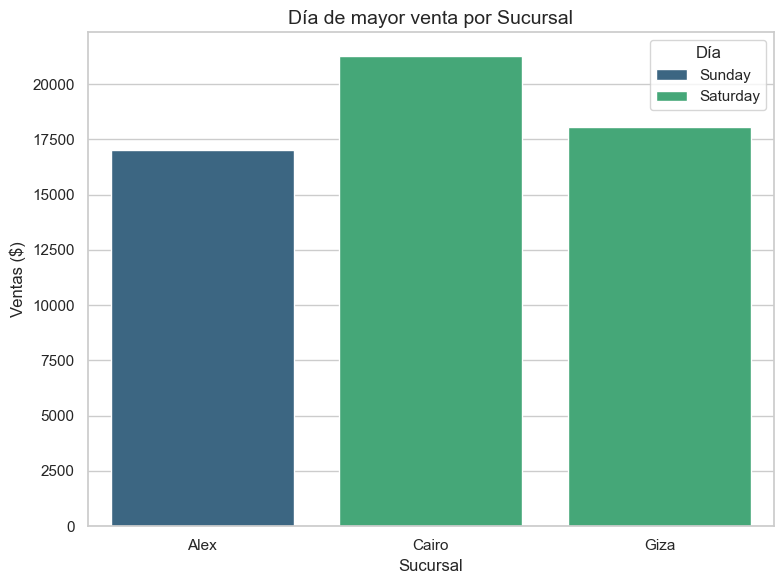

In [37]:
#------------------------Que dia de la semana se vende mas--------------------------
datosMarket["Dia"] = datosMarket["Date"].dt.day_name()

# Agrupar por sucursal y día, sumar ventas
ventas_por_dia_sucursal = datosMarket.groupby(["Branch", "Dia"])["Sales"].sum().reset_index()

# Obtener el día de mayor venta por sucursal
maximos_dia_sucursal = ventas_por_dia_sucursal.sort_values("Sales", ascending=False).groupby("Branch").first().reset_index()

# Estilo Seaborn
sns.set_theme(style="whitegrid")

# Gráfico
plt.figure(figsize=(8,6))
ax = sns.barplot(data=maximos_dia_sucursal, x="Branch", y="Sales", hue="Dia", palette="viridis")

# Personalización
plt.title("Día de mayor venta por Sucursal", fontsize=14)
plt.xlabel("Sucursal")
plt.ylabel("Ventas ($)")
plt.legend(title="Día")
plt.tight_layout()
plt.show()


***Conclusión de los día de mayor venta por sucursal***

- **Alex** alcanzó su mayor volumen de ventas el día **domingo**, con un total de **17,006.82** en ingresos.
- **Cairo** también tuvo su pico de ventas el **sábado**, con **21,284.42** generados.
- **Giza** registró su mayor ingreso el **sábado**, alcanzando **18,070.97**.

*Conclusión:* Si bien en *Alex* se presenta el día domingo com de mayor ventas, vemos consistentemente que el día sábado  mayor facturación en las otras sucursales, lo que sugiere un patrón de mayor afluencia de clientes o promociones activas durante los fines de semana. Esta información es valiosa para la planificación de personal, stock y campañas comerciales.

## 8) ANALISIS DE FRANJA HORARIA CON MAYOR CANTIDAD DE VENTAS

Se realiza un analisis de las franja horarias con mayor cantidad de ventas

In [39]:
#-----------------------En que horario se vende mas----------------------------------
#Convertir columna en data time
datosMarket["Time"]= pd.to_datetime(datosMarket["Time"], format="%I:%M:%S %p")

#Crear una columna con la hora
datosMarket["Hora"]= datosMarket["Time"].dt.hour

#Agrupar y sumar los ingresos por rango horario de 1 hora
ventas_por_hora= datosMarket.groupby ("Hora")["Sales"].sum()

#Ordenar 
hora_mas_vendida= ventas_por_hora.sort_values(ascending=False)

#Mostrar resultado
print("\nLos horarios de mas ventas son: ")
print(round(hora_mas_vendida,2).head(3))




Los horarios de mas ventas son: 
Hora
19    39699.51
13    34723.23
10    31421.48
Name: Sales, dtype: float64


***Conclusiones horarios de mayor volumen de ventas***

- El horario con mayor facturación fue las **19:00 horas**, con un total de **$39,699.51**.
- Le siguen las **13:00 horas** con **$34,723.23**, y las **10:00 horas** con **$31,421.48**.
- Esto sugiere que los picos de ventas se dan principalmente en horarios de mediodía y tarde, lo cual puede coincidir con salidas laborales, horarios de comida o compras después del trabajo.

-----------------------------ANALISIS POR PRODUCTOS---------------------------------------

## 9) ANALISIS DE LOS PRODUCTOS MAS VENDIDOS

Vamos a ordenar y fistrar los productos con mas demandas para su análisis

In [38]:
#Ordenar productos mas vendidos
productos_mas_vendidos= datosMarket.groupby("Product line")["Quantity"].sum().sort_values(ascending=False)

#Mostrar resultado
print("\nLos productos mas vendidos son: ")
print(productos_mas_vendidos.head(5))


Los productos mas vendidos son: 
Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Name: Quantity, dtype: int64


***Conclusión de los productos más vendidos***

- Los productos más vendidos del trimestre fueron los de la línea **Electronic accessories**, con un total de **971 unidades vendidas**.
- Le siguen **Food and beverages** con **952 unidades**, y **Sports and travel** con **920 unidades**.
- Esto indica una fuerte demanda por productos tecnológicos y de consumo diario, lo cual podría reflejar tanto hábitos de compra frecuentes como promociones atractivas en estas categorías.

## 10) ANLISIS DE INGRESOS POR LINEA DE PRODUCTOS

Vemos cuales son las líneas de productos que generaron mayor ingreso por ventas.


Las lineas de productos que mas ingreso genero: 
Product line
Food and beverages        2673.56
Sports and travel         2624.90
Electronic accessories    2587.50
Fashion accessories       2586.00
Home and lifestyle        2564.85
Name: gross income, dtype: float64


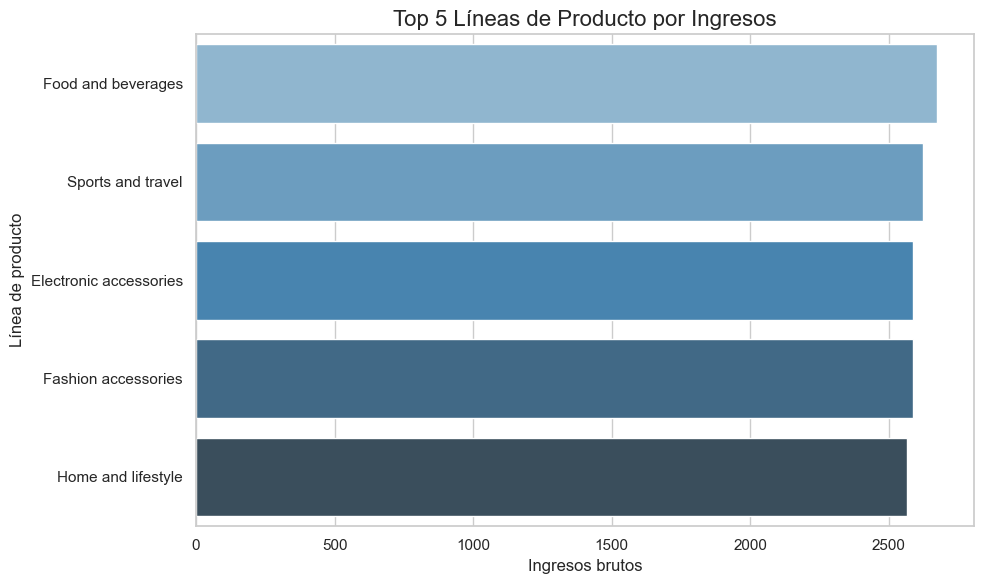

In [46]:
#------------------Que linea de producto genero mas ingresos------------------------
ingreso_por_linea_producto= datosMarket.groupby("Product line")["gross income"].sum().sort_values(ascending=False)

#Mostrar resultado
print("\nLas lineas de productos que mas ingreso genero: ")
print(round(ingreso_por_linea_producto, 2).head(5))

# Reset index para graficar 
top_ingresos = ingreso_por_linea_producto.head(5).reset_index()

# Estilo Seaborn
sns.set_theme(style="whitegrid")

# Gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_ingresos,
    y="Product line", x="gross income",
    palette="Blues_d"
)
plt.title("Top 5 Líneas de Producto por Ingresos", fontsize=16)
plt.xlabel("Ingresos brutos")
plt.ylabel("Línea de producto")
plt.tight_layout()
plt.show()


***Conclusión de líneas de producto que generaron más ingresos***

- La línea **Food and beverages** fue la que generó mayores ingresos brutos durante el trimestre, con un total de **$2,673.56**.
- Le siguen **Sports and travel** con **$2,624.90** y **Electronic accessories** con **$2,587.50**.
- Este comportamiento indica que los productos alimenticios y de viaje no solo se venden en gran volumen, sino que también aportan un margen relevante al ingreso total.
- Esta información puede ser útil para definir estrategias de stock y promociones en las categorías más rentables.


## 11) ANALISIS DE TICKET PROMEDIO POR PRODUCTO
    

In [50]:
#------------------Cual es el ticket promedio por producto--------------------------
ticket_prom_prod = datosMarket.groupby("Product line")["Sales"].mean().sort_index(ascending=False)

#Mostrar resultado
print("\nTicket promedio por producto: ")
print(round(ingreso_por_linea_producto,2))



Ticket promedio por producto: 
Product line
Food and beverages        2673.56
Sports and travel         2624.90
Electronic accessories    2587.50
Fashion accessories       2586.00
Home and lifestyle        2564.85
Health and beauty         2342.56
Name: gross income, dtype: float64


***Conclusión ticket promedio por producto***

- El ticket promedio representa el valor medio de ventas por producto en cada línea.
- Las líneas con mayor ticket promedio fueron:

  - **Home and lifestyle**
  - **Health and beauty**
  - **Fashion accessories**

- Esto indica que, aunque algunas líneas no lideren en cantidad de productos vendidos, generan ventas de mayor valor por unidad, lo que puede influir fuertemente en la rentabilidad.
- Esto ayuda a identificar productos premium o con mayor margen, ideales para campañas de ventas específicas.

----------------------------------ANALISIS DE CLIENTES-----------------------------------------

## 12) GENERO QUE REALIZA MAS COMPRAS

In [67]:
#----------------------Que genero se compra mas---------------------------------
ventas_por_genero= datosMarket.groupby("Gender")["Sales"].sum().sort_values(ascending=False)

#Mostrar resultado
print("\nEl genero que más compras realizó: ")
print(round(ventas_por_genero, 2))


El genero que más compras realizó: 
Gender
Female    194671.84
Male      128294.91
Name: Sales, dtype: float64


***Análisis de ventas por género***

- Las **ventas totales realizadas por mujeres** alcanzaron los **$194,671.84**, mientras que las **ventas realizadas por hombres** fueron de **$128,294.91**.

- Esto representa una **diferencia del 51.7% a favor del público femenino**

- Esta brecha significativa sugiere que las mujeres no solo compran más frecuentemente, sino que también podrían estar adquiriendo productos de mayor valor o en mayores cantidades.

- Esta información es clave para estrategias de marketing: enfocar promociones, productos destacados o campañas en el segmento femenino podría potenciar aún más las ventas.

## 13) ANALISIS POR TIPOS DE CLIENTES

In [64]:
#--------------------Que tipo de cliente gasta mas---------------------------
ventas_Xtipo_cliente= datosMarket.groupby("Customer type")["Sales"].sum().sort_values(ascending=False)

#Mostrar resultado
print("\nTipo de clientes según las ventas: ")
print(round(ventas_Xtipo_cliente, 2))


Tipo de clientes según las ventas: 
Customer type
Member    189694.76
Normal    133271.98
Name: Sales, dtype: float64


***Conclusión de tipos de cliente según las ventas***

- Los **clientes miembros** generaron ingresos por **$189,694.76**, superando ampliamente a los **clientes normales** que representaron **$133,271.98**.
  
- Esto sugiere que el programa de membresía es efectivo y que podría incentivarse aún más para fidelizar a los compradores.

## 14) ANALISIS DEL TICKET PROMEDIO POR CLIENTE

In [56]:
#---------------------Ticket promedio por tipo de cliente----------------------
promedio_Xtipo_cliente= datosMarket.groupby("Customer type")["Sales"].mean()

#Mostrar resultado
print("\nPromedio de gasto por tipo de cliente: ")
print(promedio_Xtipo_cliente)


Promedio de gasto por tipo de cliente: 
Customer type
Member    335.742945
Normal    306.372379
Name: Sales, dtype: float64


***Promedio de gasto por tipo de cliente***

- El gasto promedio de un **cliente miembro** es de aproximadamente **$335.74**, mientras que el de un **cliente normal** es **$306.37**.
  
- Los miembros no solo compran más, sino que también gastan más por transacción, lo que refuerza la importancia de mantener e incentivar la membresía.


## 15) METODO DE PAGO MAS UTILIZADOS POR LOS CLIENTES


Metodo de pago mas utilizados: 
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


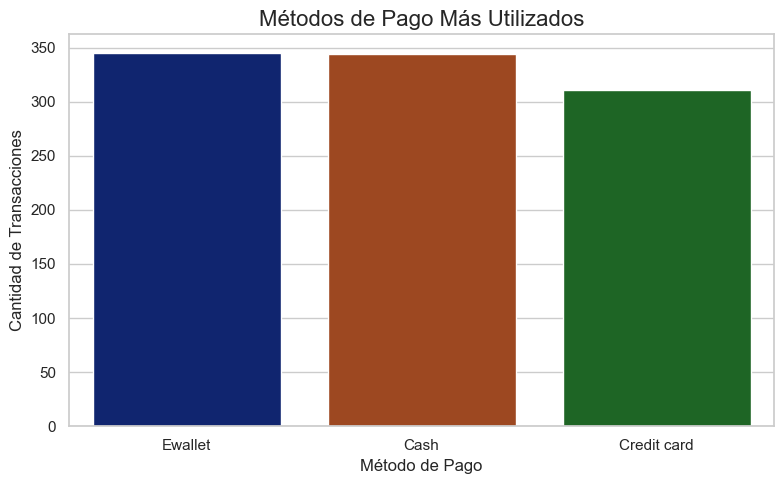

In [69]:
#-----------------------Metodo de pagos mas utilizado--------------------------------
metodo_pago_mas_usado= datosMarket["Payment"].value_counts()

#Mostrar resultado
print("\nMetodo de pago mas utilizados: ")
print(metodo_pago_mas_usado.head(3))

# Estilo Seaborn
sns.set_theme(style="whitegrid")

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(
    x=metodo_pago_mas_usado.index,
    y=metodo_pago_mas_usado.values,
    palette="dark"
)

plt.title("Métodos de Pago Más Utilizados", fontsize=16)
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Transacciones")
plt.tight_layout()
plt.show()

***Metodo de pago mas utilizado***

- El método de pago más frecuente fue **Ewallet (345 transacciones)**, seguido muy de cerca por **efectivo (344)** y **tarjeta de crédito (311)**.
  
- La alta adopción de billeteras electrónicas destaca la necesidad de seguir fortaleciendo las opciones de pago digitales.

## 🟩 CONCLUSION FINAL DEL ANALISIS

🔹 El supermercado ha mantenido una operación activa en el trimestre con más de USD 322,000 en ingresos totales, aunque con un margen bruto de rentabilidad algo ajustado (~4.76%).

🔹 Las líneas de producto más vendidas fueron **Electronic accessories** y **Food and beverages**, destacándose tanto en volumen como en ingresos.

🔹 La sucursal **Giza** lidera en facturación a pesar de tener menor cantidad de ventas, lo que sugiere tickets más altos o mayor valor por transacción.

🔹 Las ventas se concentran principalmente los **fines de semana (sábado y domingo)** y en horarios clave como **13:00 y 19:00 hs**, información útil para reforzar personal y promociones.

🔹 Las mujeres y los clientes **miembros** representaron los mayores niveles de compra, abriendo oportunidades para campañas focalizadas de fidelización y marketing.

🔹 Se detecta un uso parejo de **Ewallet, Cash y Credit Card**, lo que indica flexibilidad en los métodos de pago y alta adopción digital.

📌 Este análisis permite comprender el comportamiento de los clientes y la dinámica de ventas, lo que sienta una base sólida para optimizar estrategias de precios, promociones, stock y marketing.